## **Practicing Power Analysis**

Goal of this workbook:
1. Refresh my understanding of PowerAnalysis
2. Code up a function that I can reuse in the future
3. Allow the function to then vary give parameters, for example, nsize, threshold, and effect size so that I can easily compute necessary values for a certain power level.

In [348]:
# Modules:
import numpy as np
import pandas as pd
import scipy.stats
from matplotlib import pyplot
% matplotlib inline

**Working through this**
[resources](http://www.djmannion.net/psych_programming/data/power/power.html)



For a given N-size, two group data (mean and sigmas), and threshold (.01 for example):
- Compute the "Power" through simulation. 
- Then compute necessary n-size

In [357]:
# The function adapted from resources above.

def get_power(n,means, sigmas, thresh):
    
    n_per_group = n
    group_means = means
    group_sigmas = sigmas
    n_groups = len(group_means)
    n_sims = 1000
    sim_p = np.repeat(np.nan,n_sims)

    
    # Create Data for each group
    for i_sim in range(n_sims):
        
        # instantiate empties to fill results in n_per_group by n matrix...
        data = np.empty([n_per_group,n_groups])
        data.fill(np.nan)

        # generate n_per_group # of values for both groups.
        # assume normal and use np.random.normal to generate random values. 
        # fill in "data" container
        
        for i_group in range(n_groups):
            data[:,i_group] = np.random.normal(
                loc = group_means[i_group],
                scale = group_sigmas[i_group],
                size = n_per_group
            )
            
        # Execute Test on each iteration's generated data... 
        result = scipy.stats.ttest_ind(data[:,0], data[:,1])
        # Collect the p-value
        sim_p[i_sim] = result[1]

    # Compute # of instances where simulated p values is less than threshold
    reject = np.sum(sim_p < thresh)
    pro_rej = reject/float(n_sims)
    return n, pro_rej



** Compute the Power **

In [385]:
print("Given an nsize of %f, the power of this estimate is %f)" %  \
get_power(
    n= 100, # Nsize of study
    means =[0,.5],
    sigmas=[1,1],
    thresh = .01))

Given an nsize of 100.000000, the power of this estimate is 0.835000)


** Simulate data given sample size and compute Power at each **

Goal: choose best sample size necessary for power

In [359]:
start, end,steps = 20,50,2

out = {}
for n_size in np.arange(start,end, steps):
    key, value= get_power(n = n_size, means = [.0,.8], sigmas = [1,1], thresh = .01)
    out[key] = value

Visualize the results

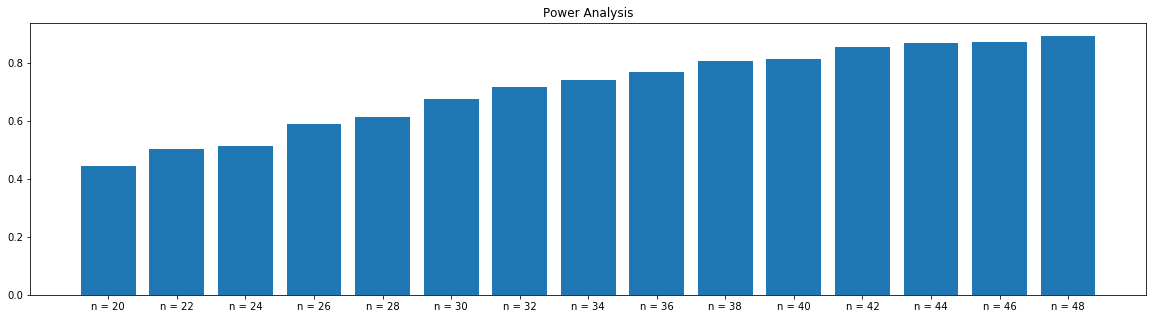

In [363]:
x = out.keys()
y = out.values()

pyplot.figure(figsize = (20,5))
pyplot.title("Power Analysis")
pyplot.bar(np.arange(len(x)),y)
pyplot.xticks(np.arange(len(x)),['n = '+ i.astype(str) for i in x])
pyplot.show()